<h2>Data Preparation</h2>

In [ ]:
# Use scikit-learn to grid search the batch size and epochs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as plt
# load dataset
dataset = pd.read_csv("./data/fraud_detection_train.csv")
dataset.head() 

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
dataset.head()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,1,1107,150,SB,P,64,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1303,200,C,L,45,1,9,E,3,...,0,0,0,0,0,0,4,0,0,1
2,3,1114,172,B,P,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
3,4,601,90,SC,L,34,2,0,Q,0,...,0,0,0,0,0,0,0,0,0,1
4,5,1006,130,B,L,27,2,0,F,0,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
# Menampilkan ringkasan statistik pada data bertipe numerik
dataset.describe()

,visit_id,kdkc,dati2,umur,jnspelsep,los,severitylevel,dx2_a00_b99,dx2_c00_d48,dx2_d50_d89,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
count,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,...,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.000000,200217.0,200217.000000
mean,100109.000000,1147.367816,184.793309,36.850602,1.669778,1.303356,0.444003,0.024893,0.008341,0.020703,...,0.005050,0.008381,0.016472,0.018370,0.001518,0.007457,0.847061,0.009225,0.0,0.500732
std,57797.813761,574.486224,107.226676,23.095928,0.470294,5.639751,0.725227,0.162484,0.093386,0.146842,...,0.073984,0.094393,0.155667,0.144878,0.043995,0.100441,1.301645,0.095603,0.0,0.500001
min,1.000000,101.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,50055.000000,903.000000,114.000000,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,100109.000000,1101.000000,169.000000,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000
75%,150163.000000,1314.000000,232.000000,56.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,1.000000
max,200217.000000,2606.000000,528.000000,109.000000,2.000000,592.000000,3.000000,4.000000,3.000000,3.000000,...,3.000000,2.000000,4.000000,4.000000,3.000000,7.000000,23.000000,1.000000,0.0,1.000000


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200217 entries, 0 to 200216
Data columns (total 53 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   visit_id       200217 non-null  int64 
 1   kdkc           200217 non-null  int64 
 2   dati2          200217 non-null  int64 
 3   typeppk        200217 non-null  object
 4   jkpst          200217 non-null  object
 5   umur           200217 non-null  int64 
 6   jnspelsep      200217 non-null  int64 
 7   los            200217 non-null  int64 
 8   cmg            200217 non-null  object
 9   severitylevel  200217 non-null  int64 
 10  diagprimer     200217 non-null  object
 11  dx2_a00_b99    200217 non-null  int64 
 12  dx2_c00_d48    200217 non-null  int64 
 13  dx2_d50_d89    200217 non-null  int64 
 14  dx2_e00_e90    200217 non-null  int64 
 15  dx2_f00_f99    200217 non-null  int64 
 16  dx2_g00_g99    200217 non-null  int64 
 17  dx2_h00_h59    200217 non-null  int64 
 18  dx2_

In [ ]:
dataset.isnull()

,visit_id,kdkc,dati2,typeppk,jkpst,umur,jnspelsep,los,cmg,severitylevel,...,proc63_67,proc68_70,proc71_73,proc74_75,proc76_77,proc78_79,proc80_99,proce00_e99,procv00_v89,label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200213,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200214,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
200215,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
dataset.columns

Index(['visit_id', 'kdkc', 'dati2', 'typeppk', 'jkpst', 'umur', 'jnspelsep',
       'los', 'cmg', 'severitylevel', 'diagprimer', 'dx2_a00_b99',
       'dx2_c00_d48', 'dx2_d50_d89', 'dx2_e00_e90', 'dx2_f00_f99',
       'dx2_g00_g99', 'dx2_h00_h59', 'dx2_h60_h95', 'dx2_i00_i99',
       'dx2_j00_j99', 'dx2_koo_k93', 'dx2_l00_l99', 'dx2_m00_m99',
       'dx2_n00_n99', 'dx2_o00_o99', 'dx2_p00_p96', 'dx2_q00_q99',
       'dx2_r00_r99', 'dx2_s00_t98', 'dx2_u00_u99', 'dx2_v01_y98',
       'dx2_z00_z99', 'proc00_13', 'proc14_23', 'proc24_27', 'proc28_28',
       'proc29_31', 'proc_32_38', 'proc39_45', 'proc46_51', 'proc52_57',
       'proc58_62', 'proc63_67', 'proc68_70', 'proc71_73', 'proc74_75',
       'proc76_77', 'proc78_79', 'proc80_99', 'proce00_e99', 'procv00_v89',
       'label'],
      dtype='object')

In [ ]:
dataset.isnull().sum()

visit_id         0
kdkc             0
dati2            0
typeppk          0
jkpst            0
umur             0
jnspelsep        0
los              0
cmg              0
severitylevel    0
diagprimer       0
dx2_a00_b99      0
dx2_c00_d48      0
dx2_d50_d89      0
dx2_e00_e90      0
dx2_f00_f99      0
dx2_g00_g99      0
dx2_h00_h59      0
dx2_h60_h95      0
dx2_i00_i99      0
dx2_j00_j99      0
dx2_koo_k93      0
dx2_l00_l99      0
dx2_m00_m99      0
dx2_n00_n99      0
dx2_o00_o99      0
dx2_p00_p96      0
dx2_q00_q99      0
dx2_r00_r99      0
dx2_s00_t98      0
dx2_u00_u99      0
dx2_v01_y98      0
dx2_z00_z99      0
proc00_13        0
proc14_23        0
proc24_27        0
proc28_28        0
proc29_31        0
proc_32_38       0
proc39_45        0
proc46_51        0
proc52_57        0
proc58_62        0
proc63_67        0
proc68_70        0
proc71_73        0
proc74_75        0
proc76_77        0
proc78_79        0
proc80_99        0
proce00_e99      0
procv00_v89      0
label       

In [ ]:
# determine the number of fraud cases
fraud = dataset[dataset['label'] == 1]
valid = dataset[dataset['label'] == 0]
 
outlier_frac = len(fraud)/float(len(valid))
print("outliar frac: ", outlier_frac)

print("Number of fraud transactions: ", len(fraud))
print("Number of tidak fraud transactions: ", len(valid))


outliar frac:  1.0029311138232528
Number of fraud transactions:  100255
Number of tidak fraud transactions:  99962


C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


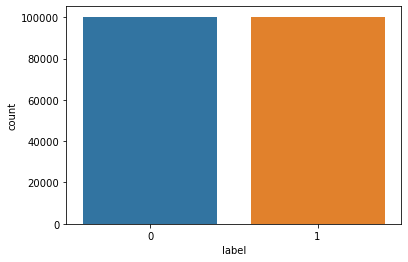

0     99962
1    100255
Name: label, dtype: int64

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
# visualize the target variable
g = sns.countplot(dataset['label'])
g.set_xticklabels(['0','1'])
plt.show()
dataset['label'].value_counts(ascending=True)

<h3>Exploratory Data Analysis</h3>

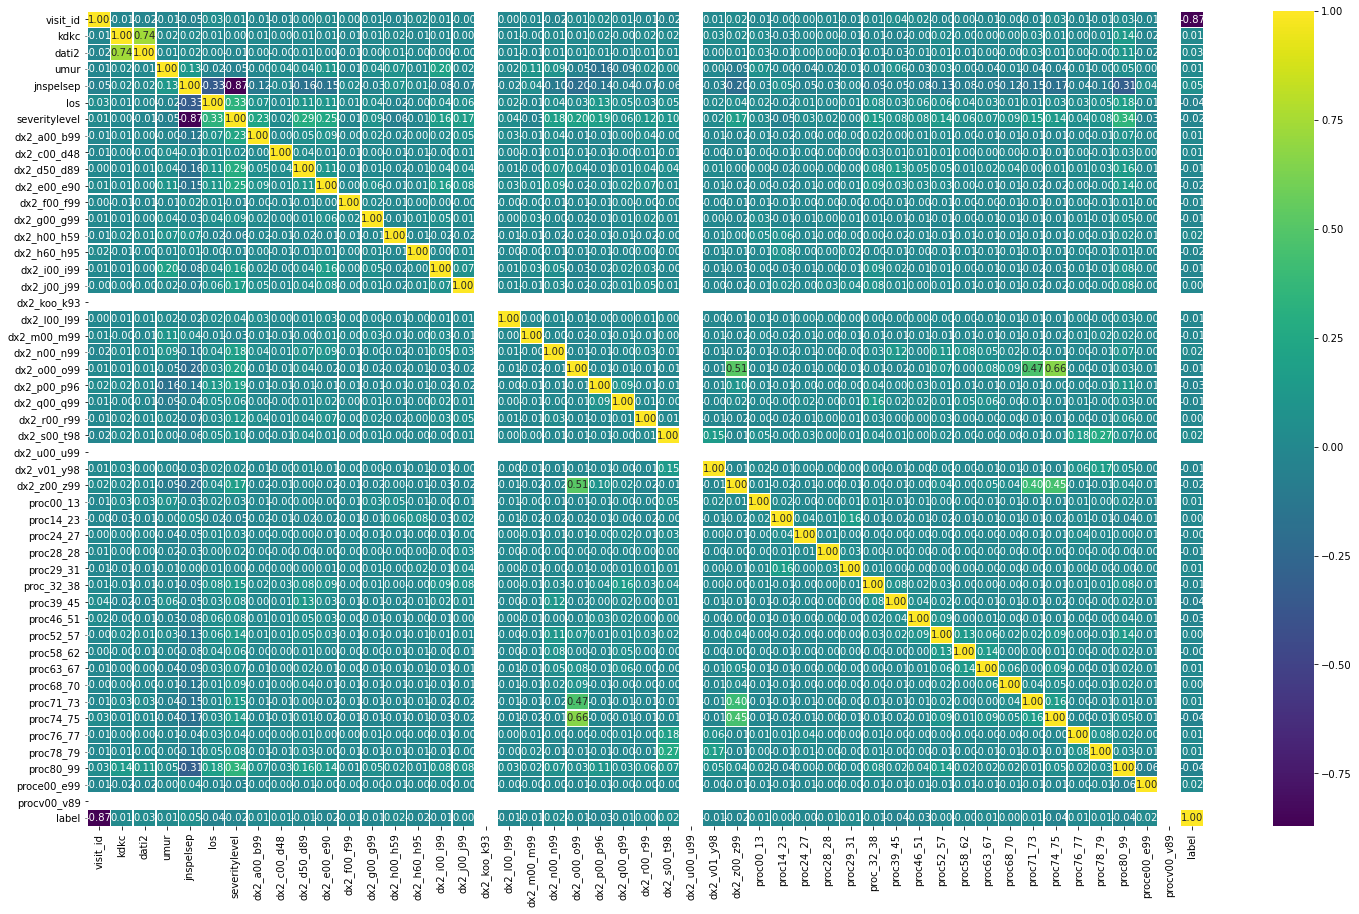

In [ ]:
#Check Correlation
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(dataset.corr(), annot=True, linewidths=.3, fmt= '.2f',ax=ax, cmap='viridis')
plt.show()

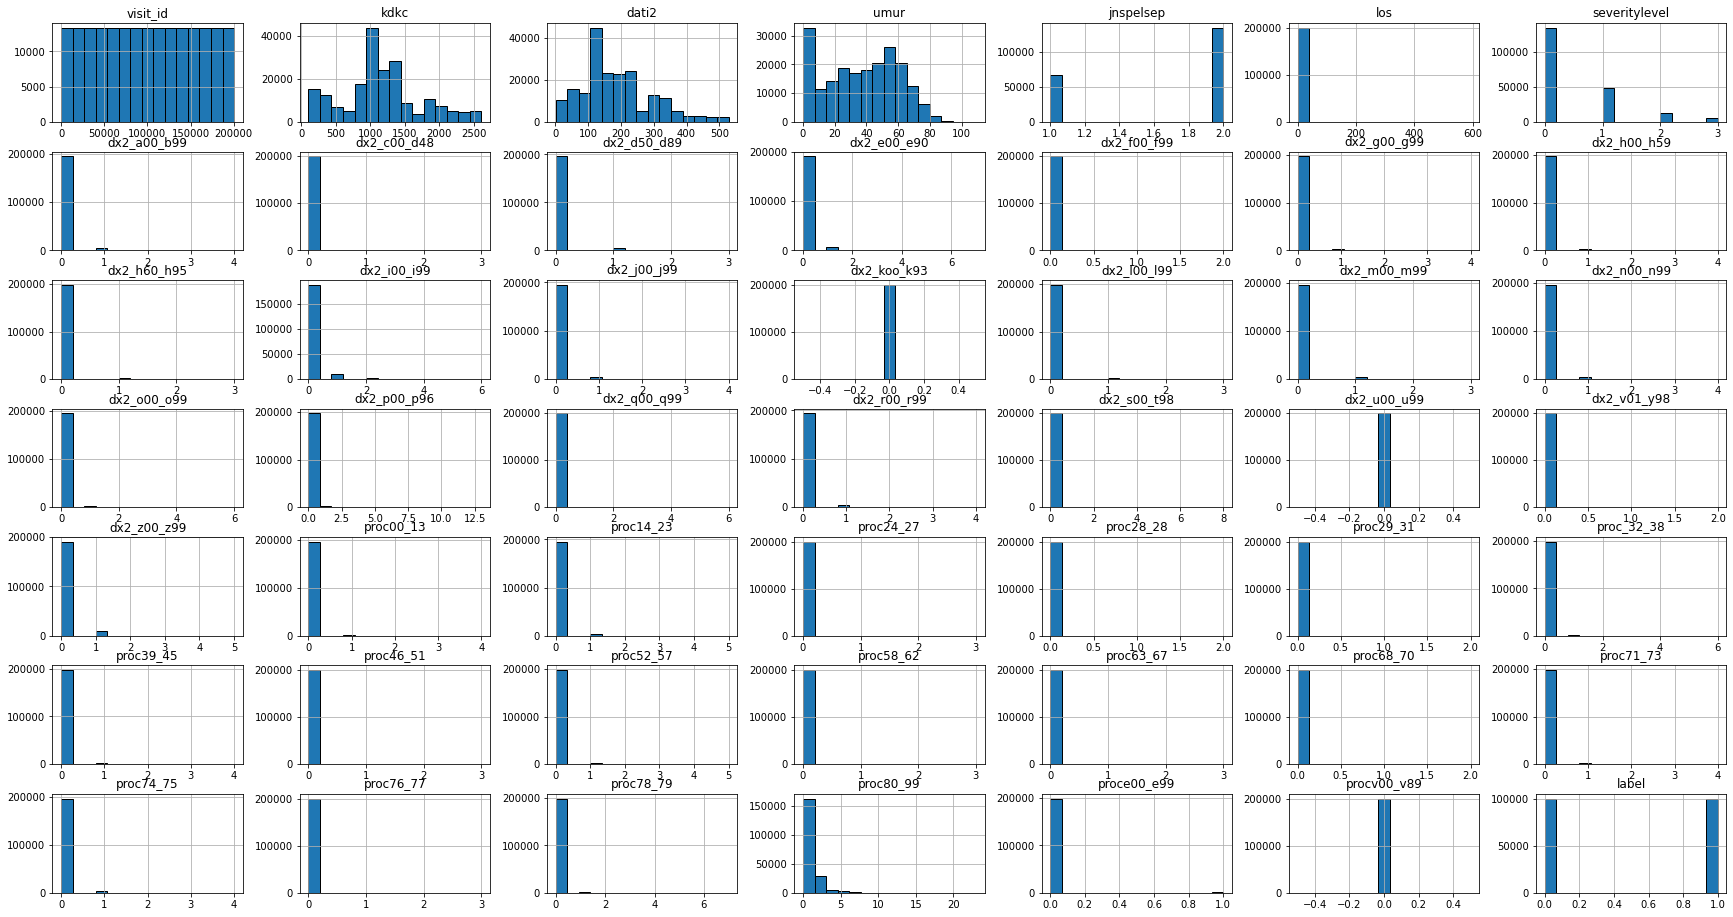

In [ ]:
# Menampilkan histogram dari semua atribut untuk melihat distribusi setiap atribut
dataset.hist(edgecolor = 'black', bins=15, figsize=(30,16));

<h3>Data Reduction</h3>

In [ ]:
# Menghapus kolom yang tidak digunakan
col_to_remove = ['visit_id','jkpst','dx2_koo_k93', 'dx2_u00_u99', 'procv00_v89']
dataset.drop(col_to_remove, axis=1, inplace=True)

<h3>Mapping Total Secondary and Procedure</h3>

In [ ]:
# Melakukan mapping untuk setiap kolom yang diawali 'dx' dan 'proc'
diag_col = dataset.columns[dataset.columns.str.contains(pat = 'dx')].tolist()
proc_col = dataset.columns[dataset.columns.str.contains(pat = 'proc')].tolist()

In [ ]:
def totals(x, cols):
  sum = 0
  for i in cols:
    sum = sum + x[i]

In [ ]:
dataset['total_diagsec'] = dataset[diag_col].sum(axis=1)
dataset['total_proc'] = dataset[proc_col].sum(axis=1)

<h3>Mapping Secondary Diagnosis and Procedure into 1 columns</h3>

In [ ]:
# Mapping kolom secondary dan procedure menjadi satu kolom
def string_manipulation(row, val_to_rep):
  result = row.replace(val_to_rep, "")

  return result

In [ ]:
def create_mapping_to_value(lst, val_to_rep):
  dicts = {}
  for i in lst:
    dicts[i] = string_manipulation(i, val_to_rep)

  return dicts

In [ ]:
diag_mapped = create_mapping_to_value(diag_col, 'dx2_')
proc_mapped = create_mapping_to_value(proc_col,'proc')

In [ ]:
def ordinal_to_categorical(df, dictionaries):
  to_append = []
  for i in range(len(df)):
    lst_dct = []
    for key in dictionaries:
      if df.loc[i, key]>=1:
        lst_dct.append(dictionaries[key])
    
    if len(lst_dct)==0:
      str_append = 'No'
    else:
      str_append = " | ".join(lst_dct)

    to_append.append(str_append)
    
  return to_append

In [ ]:
diag_append = ordinal_to_categorical(dataset, diag_mapped)
proc_append = ordinal_to_categorical(dataset, proc_mapped)

dataset['diagsec'] = diag_append
dataset['procedure'] = proc_append

In [ ]:
dataset.drop(diag_col, axis=1, inplace=True)
dataset.drop(proc_col, axis=1, inplace=True)

<h3>Mean Encoding</h3>

In [ ]:
# Mendefinisikan nilai unik pada setiap kolom
def get_unique_list(df, col_to_get):
  return df[col_to_get].unique().tolist()

In [ ]:
def mean_encoding(df, col, lst):
  mean_enc_dict = {}
  for i in lst:
    mean_encoded = df[df[col]==i]['label'].mean()
    mean_enc_dict[i] = mean_encoded
  
  mean_enc_dict['all'] = df['label'].mean()

  return mean_enc_dict

In [ ]:
kdkc_lst = get_unique_list(dataset, 'kdkc')
dati2_lst = get_unique_list(dataset, 'dati2')
typeppk_lst = get_unique_list(dataset, 'typeppk')
cmg_lst = get_unique_list(dataset, 'cmg')
sevlvl_lst = get_unique_list(dataset, 'severitylevel')
diagprimer_lst = get_unique_list(dataset, 'diagprimer')

In [ ]:
kdkc_enc = mean_encoding(dataset, 'kdkc', kdkc_lst)
dati2_enc = mean_encoding(dataset, 'dati2', dati2_lst)
typeppk_enc = mean_encoding(dataset, 'typeppk', typeppk_lst)
cmg_enc = mean_encoding(dataset, 'cmg', cmg_lst)
severitylevel_enc = mean_encoding(dataset, 'severitylevel', sevlvl_lst)
diagprimer_enc = mean_encoding(dataset, 'diagprimer', diagprimer_lst)

In [ ]:
def change_val(value, dicts):
  if value not in dicts.keys():
    return 'all'
  else:
    return value

In [ ]:
def change_mapping(df, col_name, dicts):
  df[col_name] = df[col_name].apply(lambda x : dicts[change_val(x, dicts)])
  return df

In [ ]:
dataset = change_mapping(dataset, 'kdkc', kdkc_enc)
dataset = change_mapping(dataset, 'dati2', dati2_enc)
dataset = change_mapping(dataset, 'typeppk', typeppk_enc)
dataset = change_mapping(dataset, 'cmg', cmg_enc)
dataset = change_mapping(dataset, 'severitylevel', severitylevel_enc)
dataset = change_mapping(dataset, 'diagprimer', diagprimer_enc)

<h3>Scaler</h3>

In [ ]:
from sklearn import preprocessing

scaler_age = preprocessing.MinMaxScaler()
scaler_los = preprocessing.MinMaxScaler()
scaler_diagsec = preprocessing.MinMaxScaler()
scaler_procedure = preprocessing.MinMaxScaler()

In [ ]:
minmax_age = scaler_age.fit(dataset[['umur']])
minmax_los = scaler_los.fit(dataset[['los']])
minmax_diagsec = scaler_diagsec.fit(dataset[['total_diagsec']])
minmax_proc = scaler_procedure.fit(dataset[['total_proc']])

In [ ]:
dataset['umur'] = minmax_age.transform(dataset[['umur']])
dataset['los'] = minmax_los.transform(dataset[['los']])
dataset['total_diagsec'] = minmax_diagsec.transform(dataset[['total_diagsec']])
dataset['total_proc'] = minmax_proc.transform(dataset[['total_proc']])

<h3>Mean Encoding For Diagsec and Procedure</h3>

In [ ]:
diagsec_lst = []
for i in diag_mapped.values():
  diagsec_lst.append(i)

procmapped_lst = []
for i in proc_mapped.values():
  procmapped_lst.append(i)

In [ ]:
diagsec_lst.append('No')
procmapped_lst.append('No')

In [ ]:
def create_mapping(df, lst, colname):
  lst_mapping = {}
  for i in lst:
    val_res = 0
    for j in range(len(df)):
      val_in = df.loc[j, colname].split(" | ")
      if i in val_in:
        val_res = val_res + df.loc[j, 'label']

    lst_mapping[i] = val_res/len(df)

  return lst_mapping

In [ ]:
diagsec_mapping = create_mapping(dataset, diagsec_lst, 'diagsec')
proc_mapping = create_mapping(dataset, procmapped_lst, 'procedure')

<h3>Apply Mean Encoding Result</h3>

In [ ]:
def count_means(x, dicts):
  vals = x.split(" | ")
  means = 0
  for i in vals:
    means = means + dicts[i]

  return means/len(vals)

In [ ]:
dataset['diagsec'] = dataset['diagsec'].apply(lambda x: count_means(x, diagsec_mapping))
dataset['procedure'] = dataset['procedure'].apply(lambda x: count_means(x, proc_mapping))

In [ ]:
# Training Using Stratified K-Fold
from sklearn.model_selection import GridSearchCV, StratifiedKFold
cv = StratifiedKFold(
    n_splits=10, random_state=0, shuffle=True
)

In [ ]:
dataset.head()

,kdkc,dati2,typeppk,umur,jnspelsep,los,cmg,severitylevel,diagprimer,label,total_diagsec,total_proc,diagsec,procedure
0,0.636945,0.667892,0.440689,0.587156,2,0.000000,0.518148,0.519422,0.504501,1,0.000000,0.00,0.348297,0.235305
1,0.461207,0.598854,0.548324,0.412844,1,0.015203,0.510843,0.598526,0.489088,1,0.285714,0.16,0.016988,0.225600
2,0.312500,0.353535,0.518176,0.311927,2,0.000000,0.515183,0.519422,0.499559,1,0.000000,0.00,0.348297,0.235305
3,0.596601,0.574492,0.449561,0.311927,2,0.000000,0.515183,0.519422,0.499559,1,0.000000,0.00,0.348297,0.235305
4,0.532536,0.515850,0.518176,0.247706,2,0.000000,0.518148,0.519422,0.504501,1,0.000000,0.00,0.348297,0.235305


In [ ]:
# X mengambil semua data kecuali kolom label
# X = dataset.iloc[:, [0,1,2,3,4,5,6,7,8,10,11,12,13]].values 
X = dataset.iloc[:, dataset.columns != 'label']
# y mengambil kolom label
y = dataset.iloc[:, 9].values

In [ ]:
# Membagi data menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=47)

In [ ]:
print("Banyak data latih: ", len(X_train))
print("Banyak data uji: ", len(X_test))

Banyak data latih:  160173
Banyak data uji:  40044


<h3>Support Vector Machine with Parameter Tuning</h3>

In [ ]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn import svm

In [ ]:
cv = StratifiedKFold(
    n_splits=10, random_state=0, shuffle=True
)

In [ ]:
# C=1
svc=SVC(kernel='rbf',gamma = 1000, C = 1) 

# fit classifier to training set
svc.fit(X_train,y_train)

SVC(C=1, gamma=1000)

<h3>Evaluation Result</h3>

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score

In [ ]:
def predict_model(model, X_test, y_test):
  y_pred = model.predict(X_test)

  conf_matrix = confusion_matrix(y_test, y_pred)
  print("Confusion Matrix : ")
  print(conf_matrix)
  print(" ")

  acc_score = accuracy_score(y_test, y_pred)
  print("Accuracy Score : ", acc_score)
  print(" ")

  prec_score = precision_score(y_test, y_pred)
  print("Precision Score : ", prec_score)
  print(" ")

  rec_score = recall_score(y_test, y_pred)
  print("Recall Score : ", rec_score)
  print(" ")

  return y_pred

In [ ]:
svc_predicts = predict_model(svc, X_train, y_train)

Confusion Matrix : 
[[68726 11073]
 [10267 70107]]
 
Accuracy Score :  0.8667690559582452
 
Precision Score :  0.86359940872136
 
Recall Score :  0.8722596859680991
 


In [ ]:
from sklearn import metrics
y_pred = svc.predict(X_test)
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))

Test Accuracy: 0.6447907301967836


<h3>Prediction</h3>

In [ ]:
# Prediksi dengan menghapus kolom label
pred = svc.predict(dataset.drop(['label'], axis=1))

In [ ]:
col_to_remove = ['label']
dataset.drop(col_to_remove, axis=1, inplace=True)

In [ ]:
result = dataset
# Kolom hasil dari prediksi label yaitu predict_label
result['predict_label'] = pred

In [ ]:
result

,kdkc,dati2,typeppk,umur,jnspelsep,los,cmg,severitylevel,diagprimer,total_diagsec,total_proc,diagsec,procedure,predict_label
0,0.636945,0.667892,0.440689,0.587156,2,0.000000,0.518148,0.519422,0.504501,0.000000,0.00,0.348297,0.235305,1
1,0.461207,0.598854,0.548324,0.412844,1,0.015203,0.510843,0.598526,0.489088,0.285714,0.16,0.016988,0.225600,1
2,0.312500,0.353535,0.518176,0.311927,2,0.000000,0.515183,0.519422,0.499559,0.000000,0.00,0.348297,0.235305,1
3,0.596601,0.574492,0.449561,0.311927,2,0.000000,0.515183,0.519422,0.499559,0.000000,0.00,0.348297,0.235305,1
4,0.532536,0.515850,0.518176,0.247706,2,0.000000,0.518148,0.519422,0.504501,0.000000,0.00,0.348297,0.235305,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200212,0.349456,0.248175,0.518176,0.440367,2,0.000000,0.492121,0.519422,0.510284,0.000000,0.04,0.348297,0.225600,0
200213,0.466818,0.475280,0.533658,0.009174,2,0.000000,0.515183,0.519422,0.476299,0.000000,0.00,0.348297,0.235305,1
200214,0.347649,0.366499,0.440689,0.027523,2,0.000000,0.515183,0.519422,0.499559,0.000000,0.00,0.348297,0.235305,0
200215,0.402231,0.462963,0.518176,0.477064,1,0.001689,0.503694,0.435168,0.499751,0.000000,0.04,0.348297,0.225600,1


In [ ]:
result.to_csv('result.csv', index=False)